In [99]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('covid_clean.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df[df['date'].dt.year < 2024]

df = df.set_index('date')
df.index = pd.to_datetime(df.index)

df2 = df.copy()

df = df[(df['location'] == 'Germany') | (df['location'] == 'Vietnam') | (df['location'] == 'Algeria')]

df = df.pivot(columns='location', values='new_cases')
df2 = df2.pivot(columns='location', values='new_cases')

#df = df[['new_cases']]

#df = df.groupby('date')['new_cases'].sum()

df

location,Algeria,Germany,Vietnam
date,,,
2020-01-05,0,1,0
2020-01-12,0,0,0
2020-01-19,0,0,0
2020-01-26,0,1,2
2020-02-02,0,9,4
...,...,...,...
2023-12-03,19,0,0
2023-12-10,0,0,0
2023-12-17,0,0,0


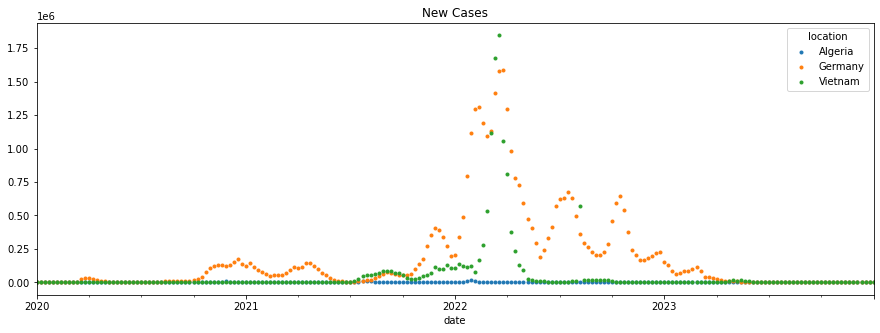

In [107]:
df.plot(style='.',
        figsize=(15, 5),
        title='New Cases')
plt.show()

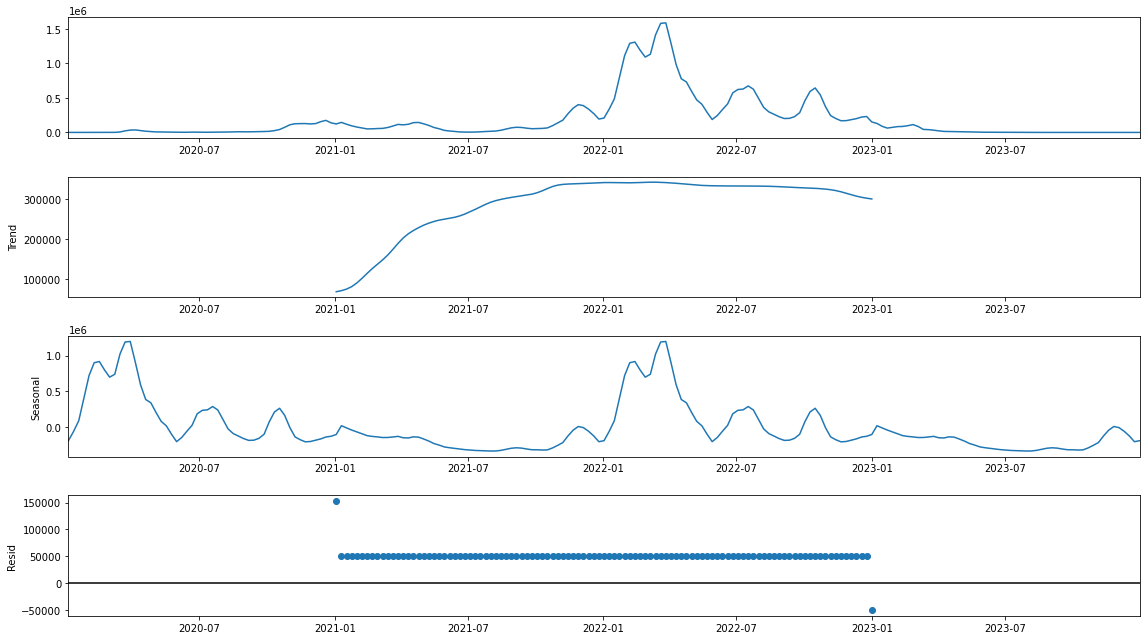

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df[['Germany']], period=104).plot()

fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

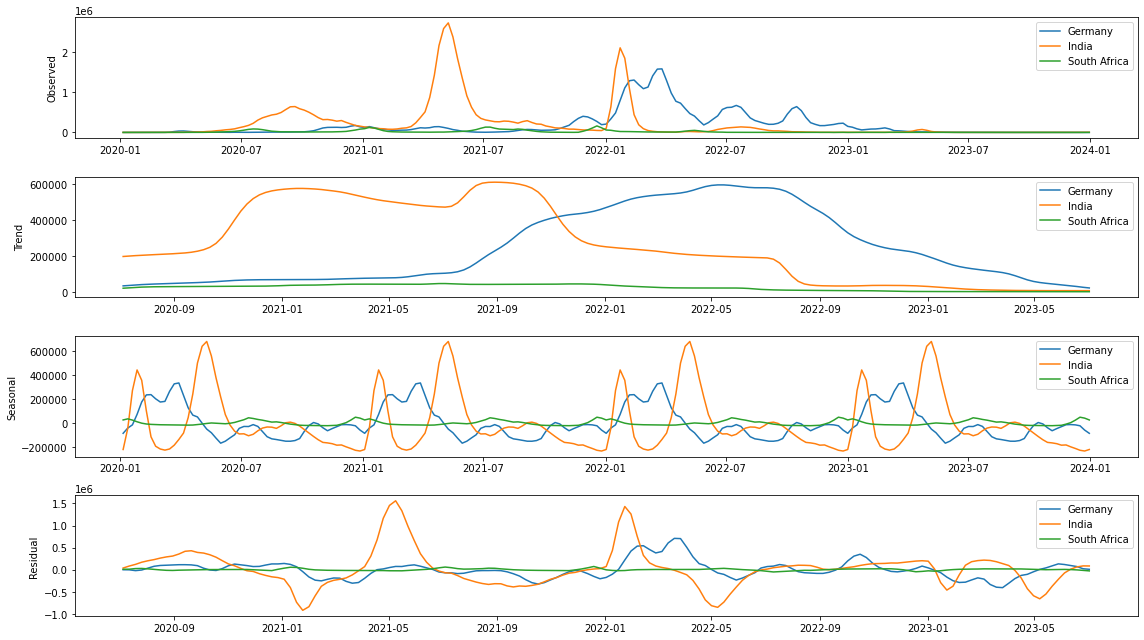

In [98]:
columns_to_decompose = ['Germany', 'India', 'South Africa']

fig, axes = plt.subplots(4, 1, figsize=(16, 9))

for column in columns_to_decompose:
    result = seasonal_decompose(df[column], period=52)
    
    axes[0].plot(result.observed, label=column)
    axes[1].plot(result.trend, label=column)
    axes[2].plot(result.seasonal, label=column)
    axes[3].plot(result.resid, label=column)

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [84]:
from statsmodels.tsa.stattools import adfuller

X = df2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ValueError: x is required to have ndim 1 but has ndim 2